Task 1: Data Pre-processing

First, we need to download and load the dataset. You can download the dataset from the provided Kaggle link and place it in your working directory.

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

In [ ]:
df=pd.read_csv("/content/sample_data/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#PRE-PROCESSING:

In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum() #no null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(None,
               Age     Na_to_K
 count  200.000000  200.000000
 mean    44.315000   16.084485
 std     16.544315    7.223956
 min     15.000000    6.269000
 25%     31.000000   10.445500
 50%     45.000000   13.936500
 75%     58.000000   19.380000
 max     74.000000   38.247000)

#PLOTS-VISUALIZATION:

<Axes: xlabel='Drug', ylabel='count'>

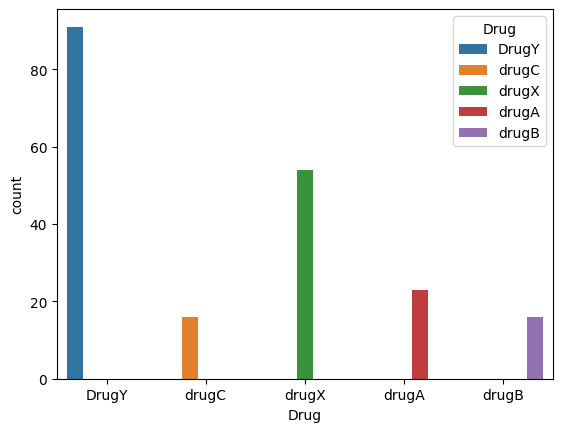

In [ ]:
sb.countplot(x='Drug',data=df,hue='Drug')


#SEGREGATION OF DATASET

In [ ]:
X = df.drop(columns = ['Drug'],axis=1)
Y = df['Drug']

In [ ]:
Y_class = len(np.unique(Y))
print(Y_class)

5


#CATEGORICAL-NUMERICAL ENCODING:

In [ ]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.5,random_state=2)

#FEATURE-SCALING TO IMPROVE OPTIMIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

Task 2: Build the ANN model
Now, we can build the artificial neural network (ANN) model using Keras, which is a high-level deep learning library in Python.

#MODEL BUILDING:

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=len(df['Drug'].unique()), activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 43,077
Trainable params: 43,077
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
17/17 [==============================] - 2s 5ms/step - loss: 1.3330 - accuracy: 0.5700
Epoch 2/48
17/17 [==============================] - 0s 3ms/step - loss: 0.8340 - accuracy: 0.6900
Epoch 3/48
17/17 [==============================] - 0s 8ms/step - loss: 0.5581 - accuracy: 0.7500
Epoch 4/48
17/17 [==============================] - 0s 10ms/step - loss: 0.3343 - accuracy: 0.9100
Epoch 5/48
17/17 [==============================] - 0s 8ms/step - loss: 0.2030 - accuracy: 0.9600
Epoch 6/48
17/17 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 0.9800
Epoch 7/48
17/17 [==============================] - 0s 13ms/step - loss: 0.0849 - accuracy: 0.9800
Epoch 8/48
17/17 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9800
Epoch 9/48
17/17 [==============================] - 0s 5ms/step - loss: 0.0497 - accuracy: 0.9800
Epoch 10/48
17/17 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9900
Epoch 11/48
17/17

Task 3: Test the model with random data
To test the model with random data, we can generate some random samples and feed them into the model for prediction.

In [ ]:
accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 1s 6ms/step - loss: 0.8799 - accuracy: 0.8500
Test Accuracy: [0.8798981308937073, 0.8500000238418579]
